# Electrostatics : The Poisson equation

The Poisson equation, in the field of electrostatics, describes the spatial distribution of electric potential $\phi$ in a region of space generated by a charge distribution $\rho$. It is a partial differential equation that can be solved to find the electric potential $\phi$ at any point in space. The Poisson equation (in 2 dimensions) is given by the following equation:
$$
\nabla^2 \phi = \frac{\partial^2}{\partial x^2} \phi + \frac{\partial^2}{\partial y^2} \phi= -\rho/\epsilon 
$$

To solve this equation numerically for a given charge distribution, we may discretize the equation using the finite difference method. The finite difference method is a numerical method for solving differential equations by replacing the derivatives with finite differences. By defining a grid, on which we define the charge distribution and the electric potential, the second derivative in the x-direction at grid point $(i,j)$ is given by
$$
\frac{\partial^2}{\partial x^2} \phi(i, j) \approx \frac{\phi(i-1, j)-2 \phi(i, j)+\phi(i+1, j)}{h^2},
$$
and similarly for the y-direction. Here, $h$ is the grid spacing.

By substituting this into the Poisson equation and solving for $\phi(i,j)$ we are left with
$$
\phi(i, j)=\frac{1}{4}\left[\phi(i-1, j)+\phi(i+1, j)+\phi(i, j-1)+\phi(i, j+1)+\frac{\rho(i, j) h^2}{\epsilon}\right],
$$
from which we see that the potential at grid point $(i,j)$ depends only on the 4 neighbouring points on the grid.

## Implementation

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
def solve(f, rho, h, stepper, atol=1.E-6, max_steps=10**5):
    fs = []
    for i in range(max_steps):
        f[30:32, 20:80] = 1.
        f[68:70, 20:80] = -1.
        f_new = stepper(f, rho, h)
        fs.append(f_new)
        if i == 10000:
            return fs
        if np.max(np.abs(f_new - f)) < atol:
            print("Converged after {} steps".format(i))
            return fs
        f = f_new

def jacobi(f, rho, h):
    f_new = np.zeros_like(f)
    f_new[1:-1, 1:-1] = 0.25 * (f[1:-1, :-2] + f[1:-1, 2:] + f[:-2, 1:-1] + f[2:, 1:-1] + h**2 * rho[1:-1, 1:-1])
    return f_new

In [12]:
rho = np.zeros((100, 100))
#rho[20, 50] = -1
#rho[80, 50] = -1
#rho[50, 20] = 1

f = np.zeros_like(rho)

res = solve(f, rho, 1, jacobi)

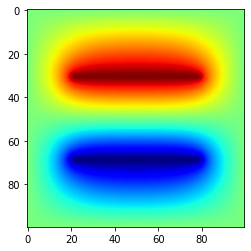

In [13]:
fig,ax = plt.subplots()
ax.imshow(res[-1], cmap='jet')

## From potential to electric field

Our solution above yields an approximation of the electric potential on the grid. To convert this to an approximation of the electric field, we can use the relation
$$
\vec{E} = -\nabla \phi.
$$

In [37]:
res_single = res[-1]

Ex = - (res_single[:, 1:] - res_single[:, :-1])/1.
Ey = - (res_single[1:, :] - res_single[:-1, :])/1.

Ex_avg = 0.5 * (Ex[:, 1:] + Ex[:, :-1])
Ey_avg = 0.5 * (Ey[1:, :] + Ey[:-1, :])

In [38]:
np.shape(Ex_avg)

(100, 98)

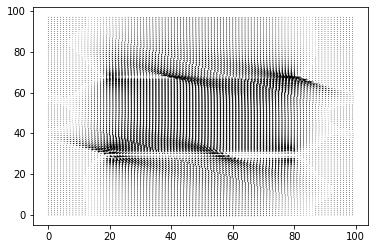

In [39]:
x,y = np.arange(0, 100), np.arange(0, 98)
X,Y = np.meshgrid(x, y)

fig,ax = plt.subplots()
ax.quiver(X,Y,Ex_avg,Ey_avg)

In [18]:
arr = np.array([
    [1, 2, 3, 4, 5],
    [6, 7, 8, 9, 10],
    [11, 12, 13, 14, 15],
    [16, 17, 18, 19, 20],
    [21, 22, 23, 24, 25]
])

In [31]:
np.shape(x)

(99,)

In [21]:
arr[1:-1, 2:]

array([[ 8,  9, 10],
       [13, 14, 15],
       [18, 19, 20]])